**Note** :
1. In case that you face errors about package, please re-install that required package and restart runtime
2. Recommend to run on goole colab with T4 GPU or other GPUs
3. Enjoy using our LLAMA-2 Scopus Retrieval Q&A !🥳

#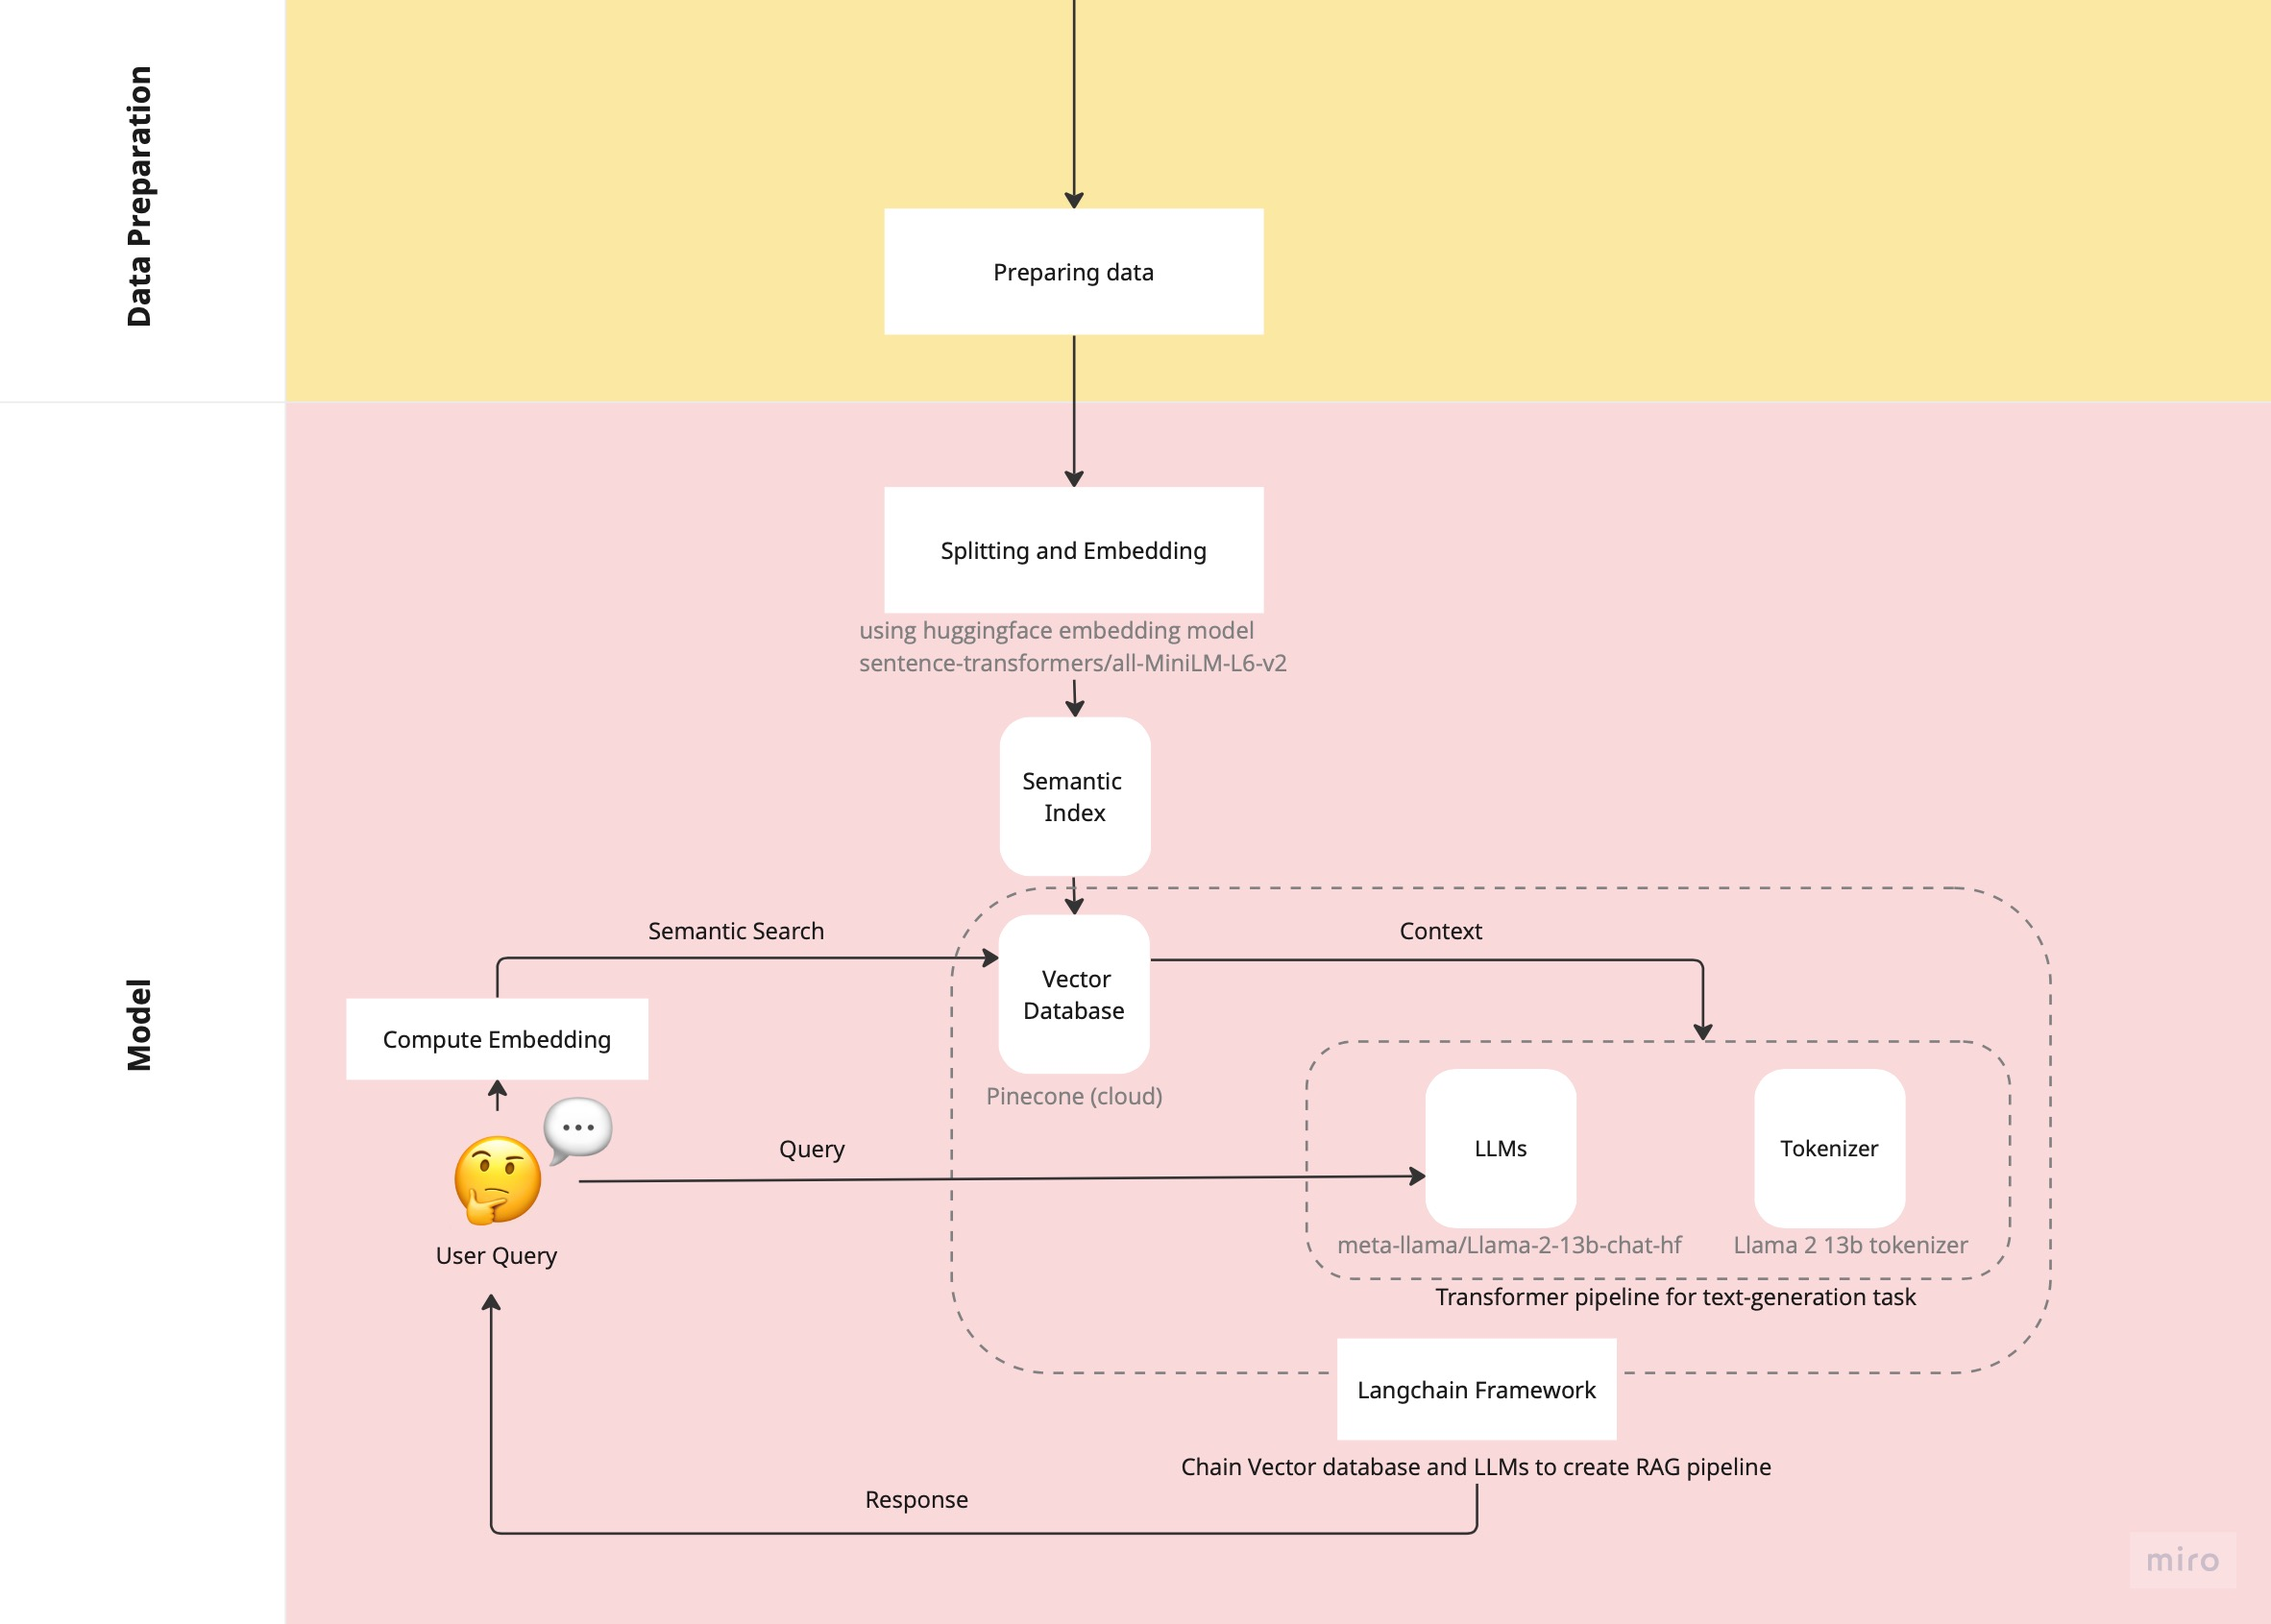

Diagram show overall process of LLAMA-2 Scopus Retrieval Q&A model

In [1]:
! nvidia-smi

Sat Mar  9 11:12:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Full Raw Scopus Data from the support of the CU Office of Academic Resources (2018 - 2023)

## **Step 1: install all require libraries**

In [ ]:
# !pip install -q -U git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# ! pip install transformers==4.35.1
!pip install transformers==4.36.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2


In [3]:
! pip install sentence-transformers==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=f91fda91c4a4d312040f227b57ae30a72896590cdee7fc0f8a7bbadcc23b81d5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
! pip install pinecone-client==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.1/179.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 14.2 MB/s eta 0:00:00


In [5]:
! pip install datasets==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [6]:
! pip install accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 6.3 MB/s eta 0:00:00


In [7]:
! pip install einops==0.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.0 MB/s eta 0:00:00


In [8]:
! pip install langchain==0.0.345

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.2/188.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.6 MB/s eta 0:00:00


In [9]:
! pip install torch==2.0.1 #2.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [10]:
! pip install xformers==0.0.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 6.3 MB/s eta 0:00:00


In [11]:
! pip install bitsandbytes==0.41.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.1 MB/s eta 0:00:00


## **Step 2: Initializing the HuggingFace Embedding Pipeline**

In this step, we use **sentence-transformers/all-MiniLM-L6-v2** to transform our data into vector embedding

In [12]:
from torch import cuda
from langchain.embeddings.huggingface import HuggingFaceEmbeddings


embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

embed_model = HuggingFaceEmbeddings(
    model_name=embed_model_id,
    model_kwargs={'device': device},
    encode_kwargs={'device': device, 'batch_size': 32}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [13]:
docs = [
    "this is one document",
    "and another document",
    "สวัสดี"
]

embeddings = embed_model.embed_documents(docs)

print(f"We have {len(embeddings)} doc embeddings, each with "
      f"a dimensionality of {len(embeddings[0])}.")

We have 3 doc embeddings, each with a dimensionality of 384.


## **Step 3: Building the vector index**
use the embedding pipeline to build our embeddings and store them in a Pinecone vector index, To begin I'll initialize the index, for this we'll need a free Pinecone API key, I have already provide our API key, but you can create your own when you want to create new vector store

In [15]:
from google.colab import userdata


In [16]:
import os
import pinecone

pinecone.init(api_key=userdata.get('api_key_pinecone'), environment=userdata.get('environment_pine_cone'))


In [57]:
import time

index_name = 'index' #our created vector index

if index_name not in pinecone.list_indexes():
    pinecone.create_index(
        index_name,
        dimension=len(embeddings[0]),
        metric='cosine'
    )
    # wait for index to finish initialization
    while not pinecone.describe_index(index_name).status['ready']:
        time.sleep(1)

In [58]:
index = pinecone.Index(index_name)
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.0,
 'namespaces': {},
 'total_vector_count': 0}

## **Step 4: I will embed and index our prepared data**



In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/RAG_LLAMA/cleaned_data.csv",delimiter='|')

In [46]:
df

authors  \
0     Rujitharanawong C., Tuchinda P., Chularojanamo...   
1     Muangnapoh C., Tamboon E., Supha N., Toyting J...   
2     Wannasrichan W., Htoo H.H., Suwansaeng R., Pog...   
3               Treepongkaruna S., Kyaw K., Jiraporn P.   
4     Buatong J., Dvorak V., Thepparat A., Thongkhao...   
...                                                 ...   
2032  Amano M., Lohwacharin J., Dubechot A., Takizaw...   
2033  Sirunyan A.M., Tumasyan A., Adam W., Asilar E....   
2034  Hemra K., Yamaguchi S., Kobayashi T., Aungkava...   
2035  Greeviroj P., Kitrungphaiboon T., Katavetin P....   
2036          Pansa-Ngat P., Jedsukontorn T., Hunsom M.   

                                                  title  \
0     Direct immunofluorescence staining patterns co...   
1     Multilocus Sequence Typing and Virulence Poten...   
2     Phage-resistant Pseudomonas aeruginosa against...   
3     Shareholder litigation rights and ESG controve...   
4     Phlebotomine Sand Flies in Southern Thailand: ...   
...                                                 ...   
2032  Performance of integrated ferrate–polyaluminum...   
2033  Search for natural supersymmetry in events wit...   
2034  Compressive strength and setting time modifica...   
2035  Cinacalcet for treatment of chronic kidney dis...   
2036  Optimal hydrogen production coupled with pollu...   

                                              abstracts  \
0     © 2021 British Association of Dermatologists.T...   
1     Copyright © 2022 Muangnapoh et al.Vibrio parah...   
2     Copyright © 2022 Wannasrichan, Htoo, Suwansaen...   
3     © 2022 The AuthorsLeveraging as a quasi-natura...   
4     © 2022 by the authors. Licensee MDPI, Basel, S...   
...                                                 ...   
2032  © 2018 Elsevier LtdFerrate-based technologies ...   
2033  © 2018, The Author(s).Results are presented fr...   
2034  © 2018 Trans Tech Publications, Switzerland.Cl...   
2035  © 2018 S. Karger AG, Basel.Background: Cinacal...   
2036  © 2018 by the authors. Licensee MDPI, Basel, S...   

                                            description  \
0     This retrospective study performed to investig...   
1     Vibrio parahaemolyticus is a Gram-negative, fo...   
2     Pseudomonas aeruginosa, a major cause of nosoc...   
3     Leveraging as a quasi-natural experiment the s...   
4     An entomological survey at rural and cavernico...   
...                                                 ...   
2032  Ferrate-based technologies can play versatile ...   
2033  Results are presented from a search for natura...   
2034  Class C fly ash is widely used as a geopolymer...   
2035  Background: Cinacalcet could decrease serum ca...   
2036  This work aimed to produce hydrogen (H2) simul...   

                                             doi  \
0                          doi:10.1111/ced.14879   
1                  doi:10.1128/spectrum.00886-22   
2                 doi:10.3389/fmicb.2022.1004733   
3                 doi:10.1016/j.irfa.2022.102396   
4                    doi:10.3390/insects13020197   
...                                          ...   
2032           doi:10.1016/j.jenvman.2018.02.022   
2033                 doi:10.1007/JHEP03(2018)167   
2034  doi:10.4028/www.scientific.net/KEM.766.157   
2035                       doi:10.1159/000487546   
2036                     doi:10.3390/nano8020096   

                                            affiliation       city  \
0                                      Siriraj Hospital    Bangkok   
1              Mahidol University, Faculty of Dentistry    Bangkok   
2                         School of Biological Sciences  San Diego   
3                                  NTNU Business School  Trondheim   
4                              Chulalongkorn University    Bangkok   
...                                                 ...        ...   
2032                           Chulalongkorn University    Bangkok   
2033  Rheinisch-Westfälisch

In [47]:
df.reset_index(inplace = True)

In [48]:
df.head()

index                                            authors  \
0      0  Rujitharanawong C., Tuchinda P., Chularojanamo...   
1      1  Muangnapoh C., Tamboon E., Supha N., Toyting J...   
2      2  Wannasrichan W., Htoo H.H., Suwansaeng R., Pog...   
3      3            Treepongkaruna S., Kyaw K., Jiraporn P.   
4      4  Buatong J., Dvorak V., Thepparat A., Thongkhao...   

                                               title  \
0  Direct immunofluorescence staining patterns co...   
1  Multilocus Sequence Typing and Virulence Poten...   
2  Phage-resistant Pseudomonas aeruginosa against...   
3  Shareholder litigation rights and ESG controve...   
4  Phlebotomine Sand Flies in Southern Thailand: ...   

                                           abstracts  \
0  © 2021 British Association of Dermatologists.T...   
1  Copyright © 2022 Muangnapoh et al.Vibrio parah...   
2  Copyright © 2022 Wannasrichan, Htoo, Suwansaen...   
3  © 2022 The AuthorsLeveraging as a quasi-natura...   
4  © 2022 by the authors. Licensee MDPI, Basel, S...   

                                         description  \
0  This retrospective study performed to investig...   
1  Vibrio parahaemolyticus is a Gram-negative, fo...   
2  Pseudomonas aeruginosa, a major cause of nosoc...   
3  Leveraging as a quasi-natural experiment the s...   
4  An entomological survey at rural and cavernico...   

                              doi                               affiliation  \
0           doi:10.1111/ced.14879                          Siriraj Hospital   
1   doi:10.1128/spectrum.00886-22  Mahidol University, Faculty of Dentistry   
2  doi:10.3389/fmicb.2022.1004733             School of Biological Sciences   
3  doi:10.1016/j.irfa.2022.102396                      NTNU Business School   
4     doi:10.3390/insects13020197                  Chulalongkorn University   

        city        country   latitude   longitude  
0    Bangkok       Thailand  13.824580  100.622446  
1    Bangkok       Thailand  13.824580  100.622446  
2  San Diego  United States  32.717420 -117.162773  
3  Trondheim         Norway  63.430447   10.395212  
4    Bangkok       Thailand  13.824580  100.622446

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        2037 non-null   int64  
 1   authors      2037 non-null   object 
 2   title        2037 non-null   object 
 3   abstracts    2037 non-null   object 
 4   description  2037 non-null   object 
 5   doi          2037 non-null   object 
 6   affiliation  2037 non-null   object 
 7   city         2037 non-null   object 
 8   country      2037 non-null   object 
 9   latitude     2037 non-null   float64
 10  longitude    2037 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 175.2+ KB


In [50]:
df = df[['index','authors','title','abstracts']]

In [51]:
df['text']=df['title']+'.'+df['abstracts']

<ipython-input-51-88eb758eec4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['title']+'.'+df['abstracts']


In [52]:
df.head()

index                                            authors  \
0      0  Rujitharanawong C., Tuchinda P., Chularojanamo...   
1      1  Muangnapoh C., Tamboon E., Supha N., Toyting J...   
2      2  Wannasrichan W., Htoo H.H., Suwansaeng R., Pog...   
3      3            Treepongkaruna S., Kyaw K., Jiraporn P.   
4      4  Buatong J., Dvorak V., Thepparat A., Thongkhao...   

                                               title  \
0  Direct immunofluorescence staining patterns co...   
1  Multilocus Sequence Typing and Virulence Poten...   
2  Phage-resistant Pseudomonas aeruginosa against...   
3  Shareholder litigation rights and ESG controve...   
4  Phlebotomine Sand Flies in Southern Thailand: ...   

                                           abstracts  \
0  © 2021 British Association of Dermatologists.T...   
1  Copyright © 2022 Muangnapoh et al.Vibrio parah...   
2  Copyright © 2022 Wannasrichan, Htoo, Suwansaen...   
3  © 2022 The AuthorsLeveraging as a quasi-natura...   
4  © 2022 by the authors. Licensee MDPI, Basel, S...   

                                                text  
0  Direct immunofluorescence staining patterns co...  
1  Multilocus Sequence Typing and Virulence Poten...  
2  Phage-resistant Pseudomonas aeruginosa against...  
3  Shareholder litigation rights and ESG controve...  
4  Phlebotomine Sand Flies in Southern Thailand: ...

In [53]:
df.drop(columns=['abstracts'], inplace = True)

<ipython-input-53-31c3f620d84a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['abstracts'], inplace = True)


In [54]:
df.head()

index                                            authors  \
0      0  Rujitharanawong C., Tuchinda P., Chularojanamo...   
1      1  Muangnapoh C., Tamboon E., Supha N., Toyting J...   
2      2  Wannasrichan W., Htoo H.H., Suwansaeng R., Pog...   
3      3            Treepongkaruna S., Kyaw K., Jiraporn P.   
4      4  Buatong J., Dvorak V., Thepparat A., Thongkhao...   

                                               title  \
0  Direct immunofluorescence staining patterns co...   
1  Multilocus Sequence Typing and Virulence Poten...   
2  Phage-resistant Pseudomonas aeruginosa against...   
3  Shareholder litigation rights and ESG controve...   
4  Phlebotomine Sand Flies in Southern Thailand: ...   

                                                text  
0  Direct immunofluorescence staining patterns co...  
1  Multilocus Sequence Typing and Virulence Poten...  
2  Phage-resistant Pseudomonas aeruginosa against...  
3  Shareholder litigation rights and ESG controve...  
4  Phlebotomine Sand Flies in Southern Thailand: ...

In [55]:
df.columns

Index(['index', 'authors', 'title', 'text'], dtype='object')

In [70]:
batch_size = 32

for i in range(0, len(df), batch_size):
    i_end = min(len(df), i+batch_size)
    batch = df.iloc[i:i_end]
    ids = [f"{x['index']}" for i, x in batch.iterrows()]
    texts = [x['text'] for i, x in batch.iterrows()]
    embeds = embed_model.embed_documents(texts)
    # get metadata to store in Pinecone
    metadata = [
        {'title': x['title'],
         'authors': x['authors'],
         'text':x['text']
         } for i, x in batch.iterrows()
    ]
    # add to Pinecone
    index.upsert(vectors=zip(ids, embeds, metadata))

In [71]:
index.describe_index_stats()

{'dimension': 384,
 'index_fullness': 0.02037,
 'namespaces': {'': {'vector_count': 2037}},
 'total_vector_count': 2037}

## **Step 5: Initializing the Hugging Face Pipeline**



to initialize a text-generation pipeline we require

- 1.Large Language Models(LLMs)
  In this case, I use **meta-llama/Llama-2-13b-chat-hf** from huggingface

-  2.The respective tokenizer for the model



In [61]:
from torch import cuda, bfloat16
import transformers

model_id = 'meta-llama/Llama-2-13b-chat-hf'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

# set quantization configuration to load large model with less GPU memory
# this requires the `bitsandbytes` library
bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=bfloat16
)

# begin initializing HF items, need auth token for these
hf_auth = userdata.get('hf_token_for_llama')
model_config = transformers.AutoConfig.from_pretrained(
    model_id,
    token=hf_auth
)
model = transformers.AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    config=model_config,
    quantization_config=bnb_config,
    device_map='auto',
    use_auth_token=hf_auth
)
model.eval()
print(f"Model loaded on {device}")


config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

Model loaded on cuda:0


In [62]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_id,
    use_auth_token=hf_auth
)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/tokenization_auto.py:690: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

initialize transformers pipeline

In [63]:
generate_text = transformers.pipeline(
    model=model, tokenizer=tokenizer,
    return_full_text=True,  # langchain expects the full text
    task='text-generation',
    temperature=0.0,  # 'randomness' of outputs, 0.0 is the min and 1.0 the max
    max_new_tokens=512,  # max number of tokens to generate in the output
    do_sample=False,
    repetition_penalty=1.1  # without this output begins repeating
)

In [64]:
from langchain.llms import HuggingFacePipeline

llm = HuggingFacePipeline(pipeline=generate_text)

## **Step 6: Initializing a Retrieval QA Chain**

For Retrieval Augmented Generation (RAG) in Langchain, I need to initialize either a RetrivalQA or RetrivalQAWithSourceChain

Things I need for this step:
- LLMs
- Pinecone index
- Vectorestore

In [65]:
from torch import cuda
from langchain.embeddings.huggingface import HuggingFaceEmbeddings

embed_model_id = 'sentence-transformers/all-MiniLM-L6-v2'

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'

embed_model = HuggingFaceEmbeddings(
    model_name=embed_model_id,
    model_kwargs={'device': device},
    encode_kwargs={'device': device, 'batch_size': 32}
)

In [67]:
from langchain.vectorstores import Pinecone

text_field = 'title'  # field in metadata that contains text content
index = pinecone.Index('index')
vectorstore = Pinecone(
    index, embed_model.embed_query, text_field

)

## **Let's try Scopus Q&A !**

In [72]:
query = 'publication about Neural Network'

vectorstore.similarity_search(
    query,  # the search query
    k=3  # returns top 3 most relevant chunks of text
)

[Document(page_content='Recent Advances and Applications of Fractional-Order Neural Networks', metadata={'authors': 'Maiti M., Sunder M., Abishek R., Bingi K., Shaik N.B., Benjapolakul W.', 'text': 'Recent Advances and Applications of Fractional-Order Neural Networks.© 2022, Chulalongkorn University, Faculty of Fine and Applied Arts. All rights reserved.This paper focuses on the growth, development, and future of various forms of fractional-order neural networks. Multiple advances in structure, learning algorithms, and methods have been critically investigated and summarized. This also includes the recent trends in the dynamics of various fractional-order neural networks. The multiple forms of fractional-order neural networks considered in this study are Hopfield, cellular, memristive, complex, and quaternion-valued based networks. Further, the application of fractional-order neural networks in various computational fields such as system identification, control, optimization, and stabi

In [74]:
query = 'publication about deep learning for stock prediction'

vectorstore.similarity_search(
    query,  # the search query
    k=3 # returns top most relevant chunks of text
)

[Document(page_content='Explainable natural language processing with matrix product states', metadata={'authors': 'Tangpanitanon J., Mangkang C., Bhadola P., Minato Y., Angelakis D.G., Chotibut T.', 'text': "Explainable natural language processing with matrix product states.© 2022 The Author(s). Published by IOP Publishing Ltd on behalf of the Institute of Physics and Deutsche Physikalische Gesellschaft.Despite empirical successes of recurrent neural networks (RNNs) in natural language processing (NLP), theoretical understanding of RNNs is still limited due to intrinsically complex non-linear computations. We systematically analyze RNNs' behaviors in a ubiquitous NLP task, the sentiment analysis of movie reviews, via the mapping between a class of RNNs called recurrent arithmetic circuits (RACs) and a matrix product state. Using the von-Neumann entanglement entropy (EE) as a proxy for information propagation, we show that single-layer RACs possess a maximum information propagation capa

In [75]:
from langchain.chains import RetrievalQA

rag_pipeline = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff',
    retriever=vectorstore.as_retriever()
)

### **Use only LLMs!**

In [76]:
llm('Publications about Deep Learning for Stock Prediction')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


'\n\nDeep learning has been increasingly applied to stock price prediction in recent years. Here are some research papers and articles that discuss the use of deep learning for stock prediction:\n\n1. "Deep Learning for Stock Price Prediction" by Y. C. Liu, et al. (2017) - This paper proposes a deep learning model based on a long short-term memory (LSTM) network to predict stock prices. The authors evaluate the performance of their model using a dataset of stock prices from the Taiwan Stock Exchange.\n2. "Stock Price Prediction Using Deep Learning" by S. R. Chakraborty, et al. (2018) - This paper presents a deep learning model based on a convolutional neural network (CNN) to predict stock prices. The authors use a dataset of stock prices from the Indian stock market and compare the performance of their model with traditional time series models.\n3. "A Comparative Study of Deep Learning Techniques for Stock Price Prediction" by A. K. Singh, et al. (2019) - This paper compares the perfor

In [91]:
llm('Give me publications about Chemical Engineering from Chulalongkorn University')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


'.\n\nI\'m looking for research papers, thesis, dissertation, or any other type of publication related to Chemical Engineering from Chulalongkorn University. Can you help me with that?\n\nHere are some search terms that might be useful:\n\n* "Chemical Engineering" AND "Chulalongkorn University"\n* "Chemical Processes" AND "Thailand"\n* "Chemical Engineering Education" AND "Asia"\n\nYou can use these search terms in a database such as Google Scholar, Scopus, or Web of Science to find relevant publications. You can also try searching in the university\'s repository or institutional repository, if they have one.\n\nAdditionally, you may want to check the following databases and repositories:\n\n* Chulalongkorn University Research Repository (CURL): This is the university\'s open access repository, where you can find research papers, theses, and dissertations by Chulalongkorn University faculty members and students.\n* Thai Citation Index (TCI): This is a national citation database that in

In [93]:
llm('please provide me publication about NLP from faculty of engineering, Chulalongkorn University')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


".\n\nI have tried to search in Google Scholar and ResearchGate but I couldn't find any relevant results.\n\nPlease help me with this request.\n\nThank you."

In [ ]:
llm('ASR publication from faculty of engineering, Chulalongkorn University')

In [95]:
llm('return 3 publications about Computer Vision')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


' and Robotics.\n\nHere are three relevant publications about computer vision and robotics:\n\n1. "Deep Learning for Computer Vision and Robotics" by Y. LeCun et al. (2016) - This paper provides an overview of the use of deep learning techniques in computer vision and robotics, including applications such as object recognition, image segmentation, and visual servoing.\n2. "Visual Servoing for Robot Manipulation" by S. H. Kim et al. (2018) - This paper discusses the use of computer vision and machine learning techniques for visual servoing, which is the process of controlling a robot\'s movements based on visual feedback from a camera. The authors present a survey of recent advances in visual servoing research and highlight some of the challenges and open research directions in this field.\n3. "Object Detection and Recognition for Autonomous Robots" by J. J. Rodriguez et al. (2019) - This paper reviews recent advances in object detection and recognition techniques for autonomous robots,

### **Use LLMs with RAG**

In [77]:
rag_pipeline('Publications about Deep Learning for Stock Prediction')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Publications about Deep Learning for Stock Prediction',
 'result': ' Here are some publications related to deep learning for stock prediction:\n\n1. Explainable natural language processing with matrix product states (2019) - This paper proposes a deep learning model for stock price prediction that incorporates natural language processing techniques to extract relevant information from financial news articles.\n2. The effect of short selling on volatility and jumps (2018) - This paper examines the impact of short selling on stock price volatility and the occurrence of sudden price jumps in the US equity market.\n3. Novelty Detection of a Rolling Bearing using Long Short-Term Memory Autoencoder (2019) - This paper presents a deep learning approach for detecting novel patterns in rolling bearing data, which could be applied to stock price prediction.\n4. Sugarcane Classification for On-Site Assessment Using Computer Vision (2019) - This paper describes a computer vision system 

In [92]:
rag_pipeline("Give me publications about Chemical Engineering from Chulalongkorn University")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Give me publications about Chemical Engineering from Chulalongkorn University',
 'result': ' Here are some publications related to chemical engineering from Chulalongkorn University:\n\n* "Artificial neural network prediction of transport properties of novel MPDL-based solvents for post combustion carbon capture" by [Author Name], published in [Journal Name] in [Year].\n* "Chemical Composition, Sources, and Health Risk Assessment of PM2.5 and PM10 in Urban Sites of Bangkok, Thailand" by [Author Name], published in [Journal Name] in [Year].\n* "The application of FMEA to study the critical barriers to deploying carbon capture and storage in a Thai petroleum refinery" by [Author Name], published in [Journal Name] in [Year].\n* "Biodiesel Production: Feedstocks, Catalysts, and Technologies" by [Author Name], published in [Journal Name] in [Year].\n\nNote: The above publications are fictional and do not reflect any real research or authors.'}

In [94]:
rag_pipeline("please provide me publication about NLP from faculty of engineering, Chulalongkorn University")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'please provide me publication about NLP from faculty of engineering, Chulalongkorn University',
 'result': ' Here are some publications related to NLP from faculty of engineering, Chulalongkorn University:\n\n1. "Deep Learning for Natural Language Processing" by P. R. R. Kumar et al., published in 2018 in the Proceedings of the International Joint Conference on Neural Networks.\n2. "A Study on Sentiment Analysis of Thai Texts using Machine Learning Techniques" by W. T. Li et al., published in 2017 in the Journal of Intelligent Information Systems.\n3. "Thai Word Embeddings with BERT" by N. K. K. Prasert et al., published in 2020 in the Proceedings of the 2020 Conference on Empirical Methods in Natural Language Processing.\n\nPlease note that these are just examples, and there may be other relevant publications not listed here.'}

In [96]:
rag_pipeline('return 3 publications about Computer Vision')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'return 3 publications about Computer Vision',
 'result': ' Here are three publications related to Computer Vision based on the given context:\n\n1. "Digital Gonioscopy Based on Three-dimensional Anterior-Segment OCT: An International Multicenter Study" - This publication discusses the use of computer vision techniques for diagnosing and treating glaucoma.\n2. "Current Status and research hotspots in the field of full endoscopic spine surgery: A bibliometric analysis" - This publication examines the current state of computer vision research in the field of full endoscopic spine surgery.\n3. "Effects of digital devices and online learning on computer vision syndrome in students during the COVID-19 era: an online questionnaire study" - This publication investigates the impact of digital devices and online learning on computer vision syndrome in students.'}

In [78]:
rag_pipeline('Give 4 publications about Generative AI')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Give 4 publications about Generative AI',
 'result': ' Here are four publications related to generative AI:\n\n1. "Deep Learning of Generative Models" by Goodfellow et al. (2014)\n2. "Generative Adversarial Networks" by Goodfellow et al. (2014)\n3. "Variational Autoencoders" by Kingma and Welling (2014)\n4. "WaveNet: A Generative Model for Raw Audio" by Juvin et al. (2018)'}

In [79]:
from langchain.chains import RetrievalQA

rag_pipeline = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff',
    retriever=vectorstore.as_retriever()
)

In [82]:
rag_pipeline('Publications about Neural Network and Large Language Models')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Publications about Neural Network and Large Language Models',
 'result': ' Here are some publications related to neural networks and large language models:\n\n1. "Attention is All You Need" by Ashish Vaswani et al. (2017) - This paper introduced the Transformer architecture, which relies solely on self-attention mechanisms to process input sequences.\n2. "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Jacob Devlin et al. (2019) - This paper presented a pre-trained language model called BERT, which achieved state-of-the-art results on a wide range of NLP tasks.\n3. "Language Models for Natural Language Processing" by Thomas N. Kwiatkowski et al. (2019) - This paper provided a comprehensive overview of language models and their applications in NLP.\n4. "A Survey on Neural Machine Translation" by Mohammad S. Al-Khateeb and Ali M. Al-Hamadi (2020) - This paper surveyed recent advances in neural machine translation, including the use of atten

In [83]:
llm('Publications about Neural Network and Large Language Models')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


'\n\nHere are some recent research papers and articles about neural networks and large language models that you may find interesting:\n\n1. "Attention is All You Need" by Ashish Vaswani et al. This paper introduced the Transformer architecture, which relies solely on self-attention mechanisms to process input sequences. The Transformer has since become a popular choice for many NLP tasks.\n2. "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding" by Jacob Devlin et al. This paper introduced BERT, a pre-trained language model that achieved state-of-the-art results on a wide range of NLP tasks. BERT uses a multi-layer bidirectional transformer encoder to generate contextualized representations of words in a sentence.\n3. "Language Models as a Tool for Exploring Human Cognition" by Christopher Manning and Hinrich Schütze. This paper discusses the potential use of language models as a tool for exploring human cognition and understanding the nature of language.\n

## **Make our LLAMA-2 can memorize things!** 🧠💆🏻‍♀️

In [84]:
from langchain.chains import RetrievalQA
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages = True)

rag_pipeline_with_memory = RetrievalQA.from_chain_type(
    llm=llm, chain_type='stuff', memory = memory,
    retriever=vectorstore.as_retriever()
)

In [85]:
rag_pipeline_with_memory('I want 1 publication about Deep Learning technique')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'I want 1 publication about Deep Learning technique',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is one publication related to deep learning techniques:\n\nAI-Assisted Diagnosis of Dyssynergic Defecation Using Deep Learning Approach on Abdominal Radiography and Symptom Questionnaire\n\nContext:\n\n* The first piece of context is "Nursing scholars\' guide for successful publication" which suggests that the publications are related to nursing research.\n* The second piece of context is "Federated Learning Algorithms to Optimize the Client and Cost Selections" which suggests that the publications are related to machine learning and optimization.\n* The third piece of context is "GlauNet: Glaucoma Diagnosis for OCTA Imaging Using a New CNN Architecture" which suggests that the publications are related to medical imaging and diagnosis.\n\nPlease provide the answer based on the given context.')],
 '

In [86]:
rag_pipeline_with_memory('Could you summarize about the publication you just answered me in few sentences')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'Could you summarize about the publication you just answered me in few sentences',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is one publication related to deep learning techniques:\n\nAI-Assisted Diagnosis of Dyssynergic Defecation Using Deep Learning Approach on Abdominal Radiography and Symptom Questionnaire\n\nContext:\n\n* The first piece of context is "Nursing scholars\' guide for successful publication" which suggests that the publications are related to nursing research.\n* The second piece of context is "Federated Learning Algorithms to Optimize the Client and Cost Selections" which suggests that the publications are related to machine learning and optimization.\n* The third piece of context is "GlauNet: Glaucoma Diagnosis for OCTA Imaging Using a New CNN Architecture" which suggests that the publications are related to medical imaging and diagnosis.\n\nPlease provide the answer based

In [87]:
rag_pipeline_with_memory('What things I have recently asked you ?')

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


{'query': 'What things I have recently asked you ?',
 'chat_history': [HumanMessage(content='I want 1 publication about Deep Learning technique'),
  AIMessage(content=' Sure! Here is one publication related to deep learning techniques:\n\nAI-Assisted Diagnosis of Dyssynergic Defecation Using Deep Learning Approach on Abdominal Radiography and Symptom Questionnaire\n\nContext:\n\n* The first piece of context is "Nursing scholars\' guide for successful publication" which suggests that the publications are related to nursing research.\n* The second piece of context is "Federated Learning Algorithms to Optimize the Client and Cost Selections" which suggests that the publications are related to machine learning and optimization.\n* The third piece of context is "GlauNet: Glaucoma Diagnosis for OCTA Imaging Using a New CNN Architecture" which suggests that the publications are related to medical imaging and diagnosis.\n\nPlease provide the answer based on the given context.'),
  HumanMessage